# Responsible AI - Project on algorithmic fairness

In [938]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data import and summary statistics

In [939]:
# read data from csv file
df = pd.read_csv('data/catalan-juvenile-recidivism-subset.csv')

In [940]:
# set display max columns for pandas dataframe
pd.set_option('display.max_columns', 500)

In [941]:
df.head(10)

,id,V1_sex,V4_area_origin,V6_province,V8_age,V9_age_at_program_end,V11_criminal_record,V12_n_criminal_record,V13_n_crime_cat,V15_main_crime_cat,V16_violent_crime,V17_crime_classification,V19_committed_crime,V20_n_juvenile_records,V21_n_crime,V23_territory_of_execution,V24_finished_program,V26_finished_measure_grouped,V27_program_duration_cat,V28_days_from_crime_to_program,V29_program_duration,V115_RECID2015_recid,V10_date_of_birth_year,V10_date_of_birth_month,V22_main_crime_date_year,V22_main_crime_date_month,V30_program_start_year,V30_program_start_month,V31_program_end_month
0,691,male,Spain,Lleida,15,17,1,1-2,3+,Against People,1,1,Lesions,1.0,4,Lleida,Internament en centre,Internment,<6 months,587.0,132,1,1992,11,2008,8,2010,4,8
1,956,female,Spain,Barcelona,14,15,1,1-2,2,Against People,1,1,Lesions,1.0,2,Barcelona,Internament en centre,Internment,6 months < 1 year,107.0,258,1,1995,7,2009,8,2009,12,8
2,2560,male,Maghreb,Barcelona,15,16,1,3-5,3+,Against People,1,1,Lesions,4.0,3,Barcelona,Internament en centre,Internment,<6 months,135.0,85,1,1994,1,2009,11,2010,3,6
3,2018,male,Maghreb,Girona,14,15,1,5+,2,Against People,1,1,Lesions,7.0,2,Girona,Internament en centre,Internment,6 months < 1 year,176.0,271,1,1994,4,2009,1,2009,6,3
4,1650,male,Spain,Tarragona,17,20,1,5+,3+,Against People,1,1,Lesions,6.0,3,Tarragona,Internament en centre,Internment,>1 year,261.0,533,1,1990,9,2008,9,2009,5,11
5,4587,male,Spain,Barcelona,16,18,1,1-2,1,Against People,1,1,Lesions,1.0,1,Barcelona,Llibertat vigilada,Probation,6 months < 1 year,420.0,212,1,1992,4,2008,7,2009,9,4
6,1613,male,Spain,Barcelona,17,19,1,3-5,3+,Against People,1,0,Lesions,3.0,4,Barcelona,Llibertat vigilada,Probation,<6 months,547.0,118,1,1990,10,2008,9,2010,3,7
7,1132,male,Maghreb,Girona,14,16,1,5+,1,Against People,1,0,Lesions,7.0,1,Girona,Llibertat vigilada,Probation,6 months < 1 year,367.0,271,1,1994,1,2008,11,2009,11,8
8,925,male,Spain,Barcelona,17,19,1,5+,1,Against People,1,0,Lesions,6.0,1,Barcelona,Llibertat vigilada,Probation,6 months < 1 year,541.0,302,1,1990,8,2008,3,2009,9,7
9,1703,male,Maghreb,Barcelona,17,17,1,3-5,1,Against People,1,1,Lesions,4.0,1,Barcelona,Assessorament tècnic menors,ATM,<6 months,109.0,29,1,1992,11,2010,1,2010,5,6


In [942]:
df.columns, df.columns.shape

(Index(['id', 'V1_sex', 'V4_area_origin', 'V6_province', 'V8_age',
        'V9_age_at_program_end', 'V11_criminal_record', 'V12_n_criminal_record',
        'V13_n_crime_cat', 'V15_main_crime_cat', 'V16_violent_crime',
        'V17_crime_classification', 'V19_committed_crime',
        'V20_n_juvenile_records', 'V21_n_crime', 'V23_territory_of_execution',
        'V24_finished_program', 'V26_finished_measure_grouped',
        'V27_program_duration_cat', 'V28_days_from_crime_to_program',
        'V29_program_duration', 'V115_RECID2015_recid',
        'V10_date_of_birth_year', 'V10_date_of_birth_month',
        'V22_main_crime_date_year', 'V22_main_crime_date_month',
        'V30_program_start_year', 'V30_program_start_month',
        'V31_program_end_month'],
       dtype='object'),
 (29,))

### Encoding categorical data

In [943]:
# encoding categorical

# apply one hot encoding to categorical features
# TODO: one hot encode the numerical categorical values as well
#df = pd.get_dummies(df, columns=[col for col in df.columns if df[col].dtype == "object"])

# # label encode columns with type "object"
from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# for col in df.columns:
#     if df[col].dtype == "object":
#         df[col] = le.fit_transform(df[col])

from collections import defaultdict
labelEncoderDict = defaultdict(LabelEncoder)

# LabelEncoding the variable
df = df.apply(lambda x: labelEncoderDict[x.name].fit_transform(x))
df

,id,V1_sex,V4_area_origin,V6_province,V8_age,V9_age_at_program_end,V11_criminal_record,V12_n_criminal_record,V13_n_crime_cat,V15_main_crime_cat,V16_violent_crime,V17_crime_classification,V19_committed_crime,V20_n_juvenile_records,V21_n_crime,V23_territory_of_execution,V24_finished_program,V26_finished_measure_grouped,V27_program_duration_cat,V28_days_from_crime_to_program,V29_program_duration,V115_RECID2015_recid,V10_date_of_birth_year,V10_date_of_birth_month,V22_main_crime_date_year,V22_main_crime_date_month,V30_program_start_year,V30_program_start_month,V31_program_end_month
0,654,1,4,2,1,3,1,1,2,0,1,1,15,1,3,2,5,2,1,565,132,1,8,10,7,7,6,3,7
1,910,0,4,0,0,1,1,1,1,0,1,1,15,1,1,0,5,2,0,103,249,1,11,6,8,7,5,11,7
2,2464,1,2,0,1,2,1,2,2,0,1,1,15,4,2,0,5,2,1,131,85,1,10,0,8,10,6,2,5
3,1941,1,2,1,0,1,1,3,1,0,1,1,15,7,1,1,5,2,0,172,261,1,10,3,8,0,5,5,2
4,1578,1,4,3,3,6,1,3,2,0,1,1,15,6,2,3,5,2,2,255,427,1,6,8,7,8,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,252,1,1,3,2,3,0,0,0,2,0,1,21,0,0,3,7,3,1,87,125,0,8,11,8,5,5,8,0
4648,952,1,1,3,3,4,0,0,1,2,0,1,21,0,1,3,7,3,1,35,41,0,8,6,9,6,6,7,8
4649,3840,1,1,0,3,4,0,0,0,2,0,1,21,0,0,0,7,3,1,90,38,0,8,9,9,7,6,10,11
4650,3862,1,1,0,3,3,0,0,0,2,0,1,21,0,0,0,7,3,1,82,119,0,8,4,8,7,5,10,2


In [944]:
def inverse_labelencode(df):
    if type(df) == pd.core.series.Series: df = pd.DataFrame(df) # if series, cast as dataframe
    return df.apply(lambda x: labelEncoderDict[x.name].inverse_transform(x))

In [945]:
inverse_labelencode(df.V1_sex)

,V1_sex
0,male
1,female
2,male
3,male
4,male
...,...
4647,male
4648,male
4649,male
4650,male


### Functions for plotting ROC curves

In [946]:
from sklearn import metrics

def plot_roc_curves(y_test, pred_proba, legend=""):
    fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba)
    plt.plot(fpr, tpr, label=legend)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend()

In [947]:
def plot_roc_curves_class(X_test, y_test, model, column):
    y_prob = pd.DataFrame(model.predict_proba(X_test))[1].values
    for class_ in X_test[column].unique():
        filter = (X_test[column] == class_)
        fpr, tpr, _ = metrics.roc_curve(y_test[filter], y_prob[filter])
        plt.plot(fpr, tpr, label=class_)
        
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title(f"ROC curve for {column}")
    plt.legend()

## Training

Split the dataset into training, validation and test sets, and train a machine
learning algorithm of your choice to predict the variable Recidivism

In [948]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [949]:
# Split features and target
X = df.drop(columns=["V115_RECID2015_recid", "id"])
y = df.V115_RECID2015_recid

In [950]:
# Split dataset into training set and test set  # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

### Define and fit model

In [951]:
# import sklearn random forest
from sklearn.ensemble import RandomForestClassifier

# fit a logistic regression classifier on X_train using sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

#model = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

### Calculate accuracy

In [952]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7231298366294067


In [953]:
# get encoding from label encoder. Female = 0 and male = 1
# labelEncoderDict["V1_sex"].classes_
labelEncoderDict["V4_area_origin"].classes_

array(['Europe', 'Latin America', 'Maghreb', 'Other', 'Spain'],
      dtype=object)

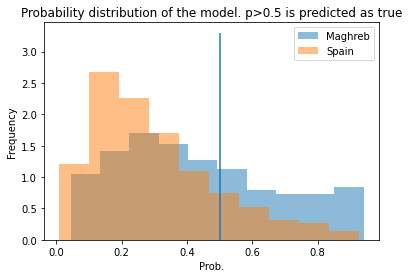

In [954]:
# see difference in predictions probabilities for male and female
#filter_sensitive_group1 = (X_test.V1_sex == 0).values
filter_sensitive_group1 = (X_test.V4_area_origin == 2).values
filter_sensitive_group2 = (X_test.V4_area_origin == 4).values
legend1 = "Maghreb"
legend2 = "Spain"

y_pred_proba = pd.Series([prob for _,prob in model.predict_proba(X_test)]) # TODO make sure it the second value in tuples
y_pred_proba[filter_sensitive_group1].plot(kind="hist", alpha=0.5, label=legend1, density=True)
y_pred_proba[filter_sensitive_group2].plot(kind="hist", alpha=0.5, label=legend2, density=True)
plt.xlabel("Prob.")
plt.vlines(0.5,0,3.3)
plt.legend()
plt.title("Probability distribution of the model. p>0.5 is predicted as true")
plt.show()

In [955]:
print("Percent recid women: ", y[X.V1_sex == 0].mean(), "Percent recid men: ", y[X.V1_sex == 1].mean()) # TODO redo for sensitive group

Percent recid women:  0.20481927710843373 Percent recid men:  0.37257980115122974


In [956]:
# calculate tpr and fpr for different thresholds
def tpr_fpr(y_pred_proba, y_test, th):
    y_pred = y_pred_proba > th
    # true positive rate
    tp = ((y_pred == y_test.values) & (y_pred == 1)).sum()
    p = y_test.sum()

    # false positive rate
    fp = ((y_pred != y_test.values) & (y_pred == 1)).sum()
    n = (y_test==0).sum()
    
    return (tp / p), (fp / n)


In [957]:
# plot roc for first 15 categories
# for class_ in X.columns:
#     if len(X[class_].unique()) > 15: continue # only plot categorical features
#     plot_roc_curves_class(X_test, y_test, model, class_)
#     # plt.show()

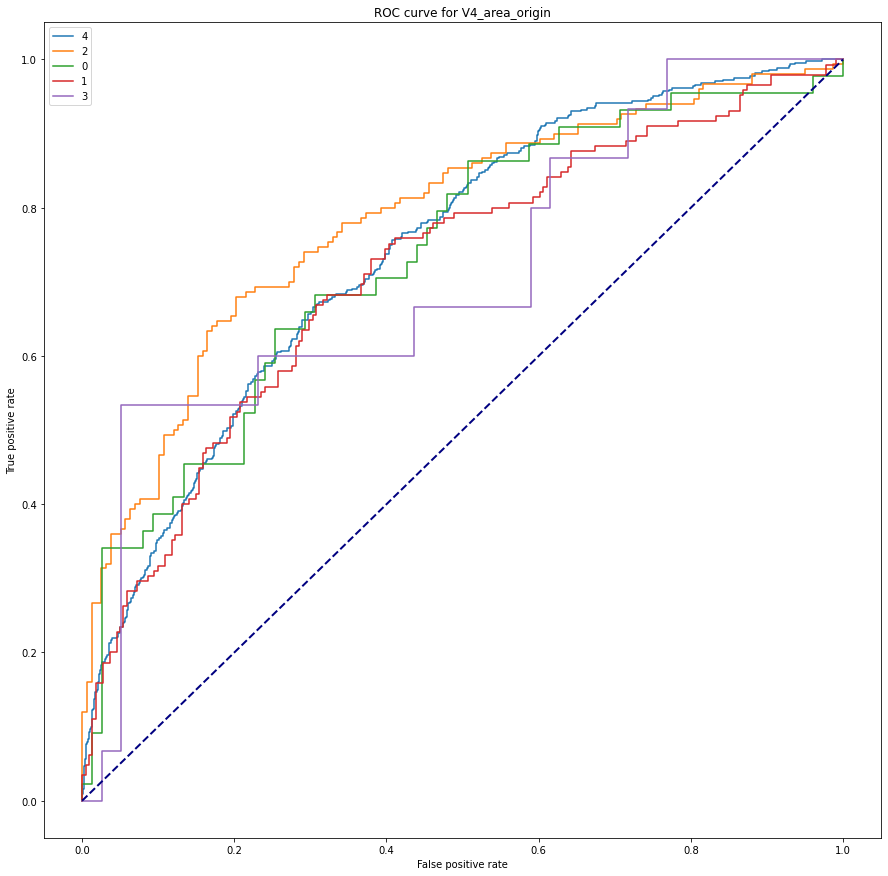

In [958]:
plt.figure(figsize=(15,15))
plot_roc_curves_class(X_test, y_test, model, "V4_area_origin")


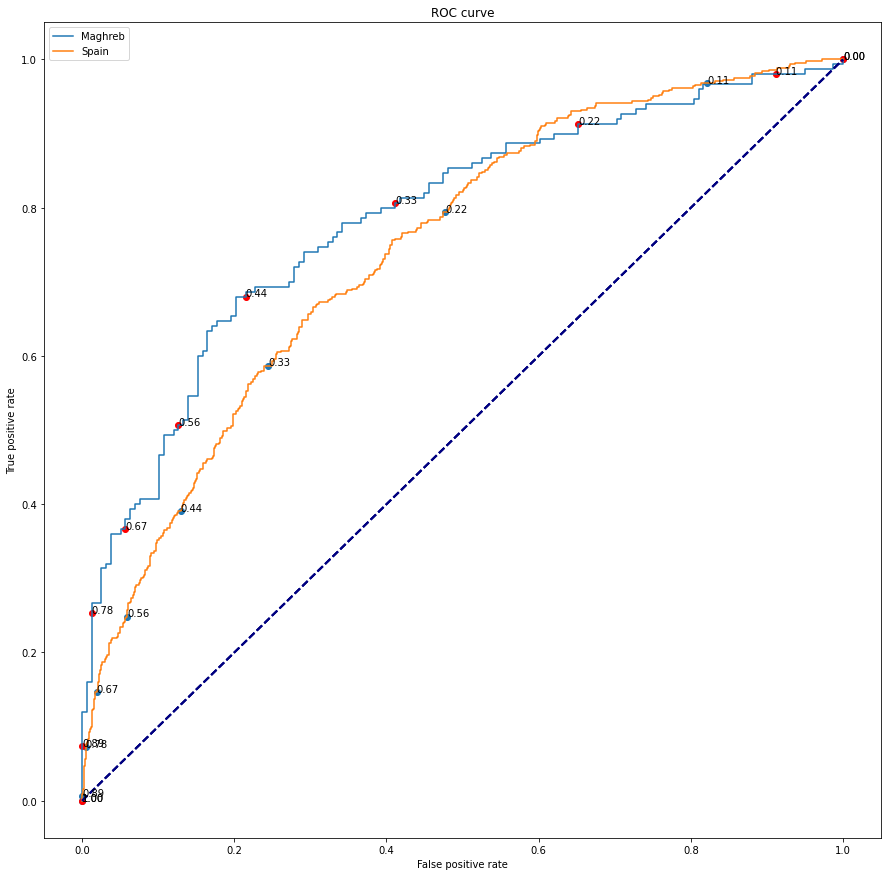

In [959]:
plt.figure(figsize=(15,15))

plot_roc_curves(y_test[filter_sensitive_group1], y_pred_proba[filter_sensitive_group1], legend=legend1)
plot_roc_curves(y_test[filter_sensitive_group2], y_pred_proba[filter_sensitive_group2], legend=legend2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

values = [tpr_fpr(y_pred_proba[filter_sensitive_group2], y_test[filter_sensitive_group2], th) for th in np.linspace(1,0,10)]
tprs = [val[0] for val in values]
fpsr = [val[1] for val in values]
plt.scatter(fpsr, tprs)
for i, txt in enumerate(np.linspace(1,0,10)):
    plt.annotate(f"{txt:.2f}", (fpsr[i], tprs[i]))

values = [tpr_fpr(y_pred_proba[filter_sensitive_group1], y_test[filter_sensitive_group1], th) for th in np.linspace(1,0,10)]
tprs = [val[0] for val in values]
fpsr = [val[1] for val in values]
plt.scatter(fpsr, tprs, color="red")

# annotate each scatter point
for i, txt in enumerate(np.linspace(1,0,10)):
    plt.annotate(f"{txt:.2f}", (fpsr[i], tprs[i]))

plt.show()

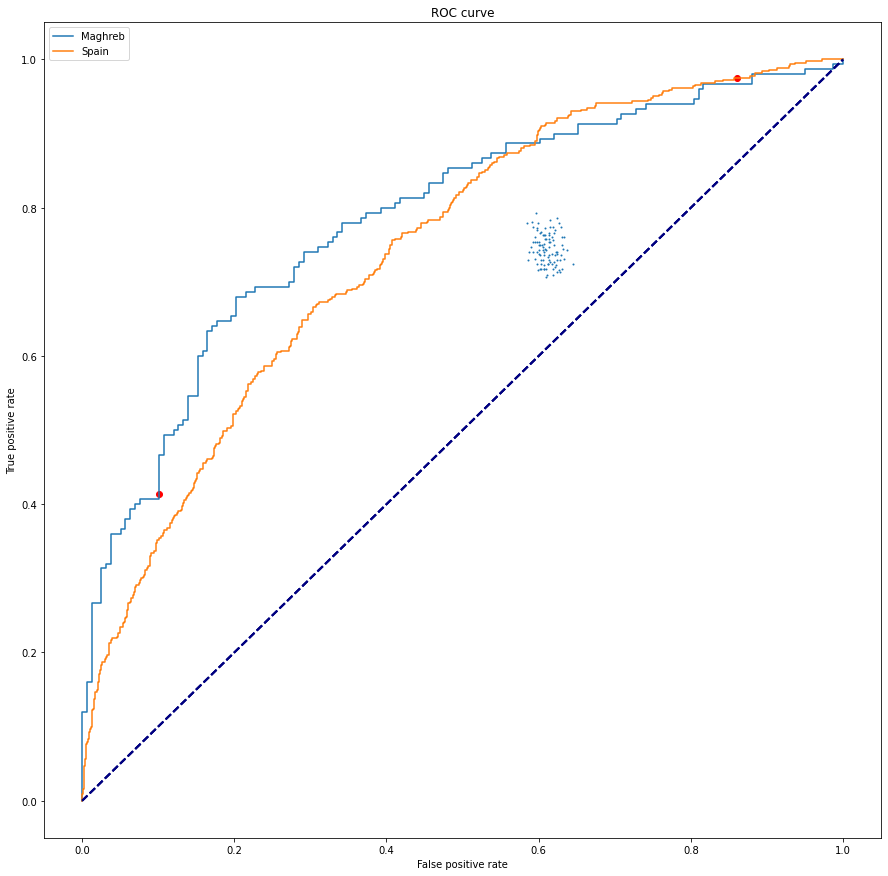

In [960]:
plt.figure(figsize=(15,15))

plot_roc_curves(y_test[filter_sensitive_group1], y_pred_proba[filter_sensitive_group1], legend=legend1)
plot_roc_curves(y_test[filter_sensitive_group2], y_pred_proba[filter_sensitive_group2], legend=legend2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

tpr,fpr = tpr_fpr(y_pred_proba[filter_sensitive_group1], y_test[filter_sensitive_group1], 0.6)
plt.scatter(fpr, tpr, color="r")
tpr,fpr = tpr_fpr(y_pred_proba[filter_sensitive_group2], y_test[filter_sensitive_group2], 0.1)
plt.scatter(fpr, tpr, color="r")

values = []
th = 0.7
for _ in range(100):
    ths = [0.1 if r < th else 0.6 for r in np.random.random(y_pred_proba[filter_sensitive_group2].shape[0])]
    values.append( tpr_fpr(y_pred_proba[filter_sensitive_group2], y_test[filter_sensitive_group2], ths))
tprs = [val[0] for val in values]
fpsr = [val[1] for val in values]
plt.scatter(fpsr, tprs, s=1)

plt.show() #TODO: make use of the lower half of the graph, plot the equivelent plot for the two metrics from the course

Please design your own criteria for diagnosing the three main definitions
of fairness: Independence, Separation and Sufficiency. Use your criteria to
perform a diagnostic test of your algorithm with respect to sensitive groups
such as race and/or gender. Please describe your designed diagnostic
criteria, as well as the results of your test. The rest of the project will be
most interesting if you have picked a classifier where you observe unfairness
at this point.

In [961]:
# ### Attributes to test
# Sex: \
# 'V1_sex_female' \
# 'V1_sex_male' 

# Origin: \
# 'V4_area_origin_Europe' \
# V4_area_origin_Latin America'\
# 'V4_area_origin_Maghreb'\
# 'V4_area_origin_Other'

# Age:\
# 'V8_age_14' \
# 'V8_age_15' \
# 'V8_age_16' \
# 'V8_age_17' 



## Independence

In [962]:
# test independence of the model when using binary label encodings # TODO expand to non-binary / switch back to one-hot-encodings
# use the label encoder to invert the encodings prior to printing such that the actual labels show
def test_independence(model, X, sensitive_category, allowed_err=0, print_results=True):
    """
    Summary: calculates the independence of predictions from model of a sensitive category
    """
    # get predictions of target variable from features
    y_pred = model.predict(X)
    # get binary filter for separating groups
    filter_is_group_0 = X[sensitive_category] == 0

    # calculate p(y_pred=1|A=a) and p(y_pred=1|A=b)
    p_0 = np.mean(y_pred[filter_is_group_0])
    p_1 = np.mean(y_pred[~filter_is_group_0])

    #print results
    if print_results:
        print(f"p(y_pred=1|A={0}) = {p_0:.3f}")
        print(f"p(y_pred=1|A={1}) = {p_1:.3f}")
        if abs(p_0 - p_1) <= allowed_err: print("Model passes independence test")
        else: print("Model does not pass independence test")

    return abs(p_0 - p_1) <= allowed_err, abs(p_0 - p_1)


In [963]:
test_independence(model, X_test, "V4_area_origin", allowed_err=0.1)

p(y_pred=1|A=0) = 0.403
p(y_pred=1|A=1) = 0.203
Model does not pass independence test


(False, 0.1999177559560299)

In [964]:
#test_independence(model,X, "V1_sex_male", "V1_sex_female", allowed_err=0.05)

comment: the model discriminates males

In [980]:
# test independence of the model when using binary label encodings # TODO expand to non-binary / switch back to one-hot-encodings
# use the label encoder to invert the encodings prior to printing such that the actual labels show
def test_seperation(model, X, y, sensitive_category, class1, class2, allowed_err=0, print_results=True):
    """
    Summary: calculates the independence of predictions from model of a sensitive category
    """
    # get predictions of target variable from features
    y_pred = model.predict(X)

    filter_sensitive_group1 = X[sensitive_category] == class1
    filter_sensitive_group2 = X[sensitive_category] == class2

    # calculate p(y_pred=1|A=a) and p(y_pred=1|A=b)
    p_0 = np.mean(y_pred[filter_sensitive_group1] & (y[filter_sensitive_group1] == 1))
    p_1 = np.mean(y_pred[filter_sensitive_group2] & (y[filter_sensitive_group2] == 1))
    p_2 = np.mean(y_pred[filter_sensitive_group1] & (y[filter_sensitive_group1] == 0))
    p_3 = np.mean(y_pred[filter_sensitive_group2] & (y[filter_sensitive_group2] == 0))

    #print results
    if print_results:
        print(f"p(y_pred=1|Y=1, A={0}) = {p_0:.3f}")
        print(f"p(y_pred=1|Y=1,A={1}) = {p_1:.3f}")
        print(f"p(y_pred=1|Y=0,A={0}) = {p_2:.3f}")
        print(f"p(y_pred=1|Y=0,A={1}) = {p_3:.3f}")
        if abs(p_0 - p_1) <= allowed_err and abs(p_2 - p_3) <= allowed_err: print("Model passes independence test")
        else: print("Model does not pass independence test")

    return abs(p_0 - p_1) <= allowed_err and abs(p_2 - p_3) <= allowed_err, abs(p_0 - p_1), abs(p_2 - p_3)


In [984]:
test_seperation(model, X_train, y_train, "V4_area_origin", 2, 4)

p(y_pred=1|Y=1, A=0) = 0.334
p(y_pred=1|Y=1,A=1) = 0.109
p(y_pred=1|Y=0,A=0) = 0.119
p(y_pred=1|Y=0,A=1) = 0.046
Model does not pass independence test


(False, 0.22593072306525375, 0.07298962487191885)

In [ ]:
_=test_seperation(model,X,y, 'V4_area_origin_Europe', 'V4_area_origin_Latin America')
_=test_seperation(model,X,y, 'V4_area_origin_Maghreb', 'V4_area_origin_Other')

p(y_pred=1|Y=1, A=V4_area_origin_Europe) = 0.855
p(y_pred=1|Y=1, A=V4_area_origin_Latin America) = 0.857
p(y_pred=1|Y=0, A=V4_area_origin_Europe) = 0.056
p(y_pred=1|Y=0, A=V4_area_origin_Latin America) = 0.029
The model does not fulfill seperation
p(y_pred=1|Y=1, A=V4_area_origin_Maghreb) = 0.902
p(y_pred=1|Y=1, A=V4_area_origin_Other) = 0.833
p(y_pred=1|Y=0, A=V4_area_origin_Maghreb) = 0.075
p(y_pred=1|Y=0, A=V4_area_origin_Other) = 0.027
The model does not fulfill seperation


In [ ]:
pred_proba = pd.DataFrame(model.predict_proba(X_test))[1]

In [ ]:
for th in np.linspace(0,1,100):
    pred = pred_proba > th
    

In [ ]:
(pd.DataFrame(model.predict_proba(X_test))[1] > 0.5).sum()

291

In [ ]:
y_test.replace(1,True).replace(0,False)

4183    False
2362     True
1390    False
4143    False
2075    False
        ...  
1716    False
1082    False
234      True
941      True
1807    False
Name: V115_RECID2015_recid, Length: 1396, dtype: bool